In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("diabete.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


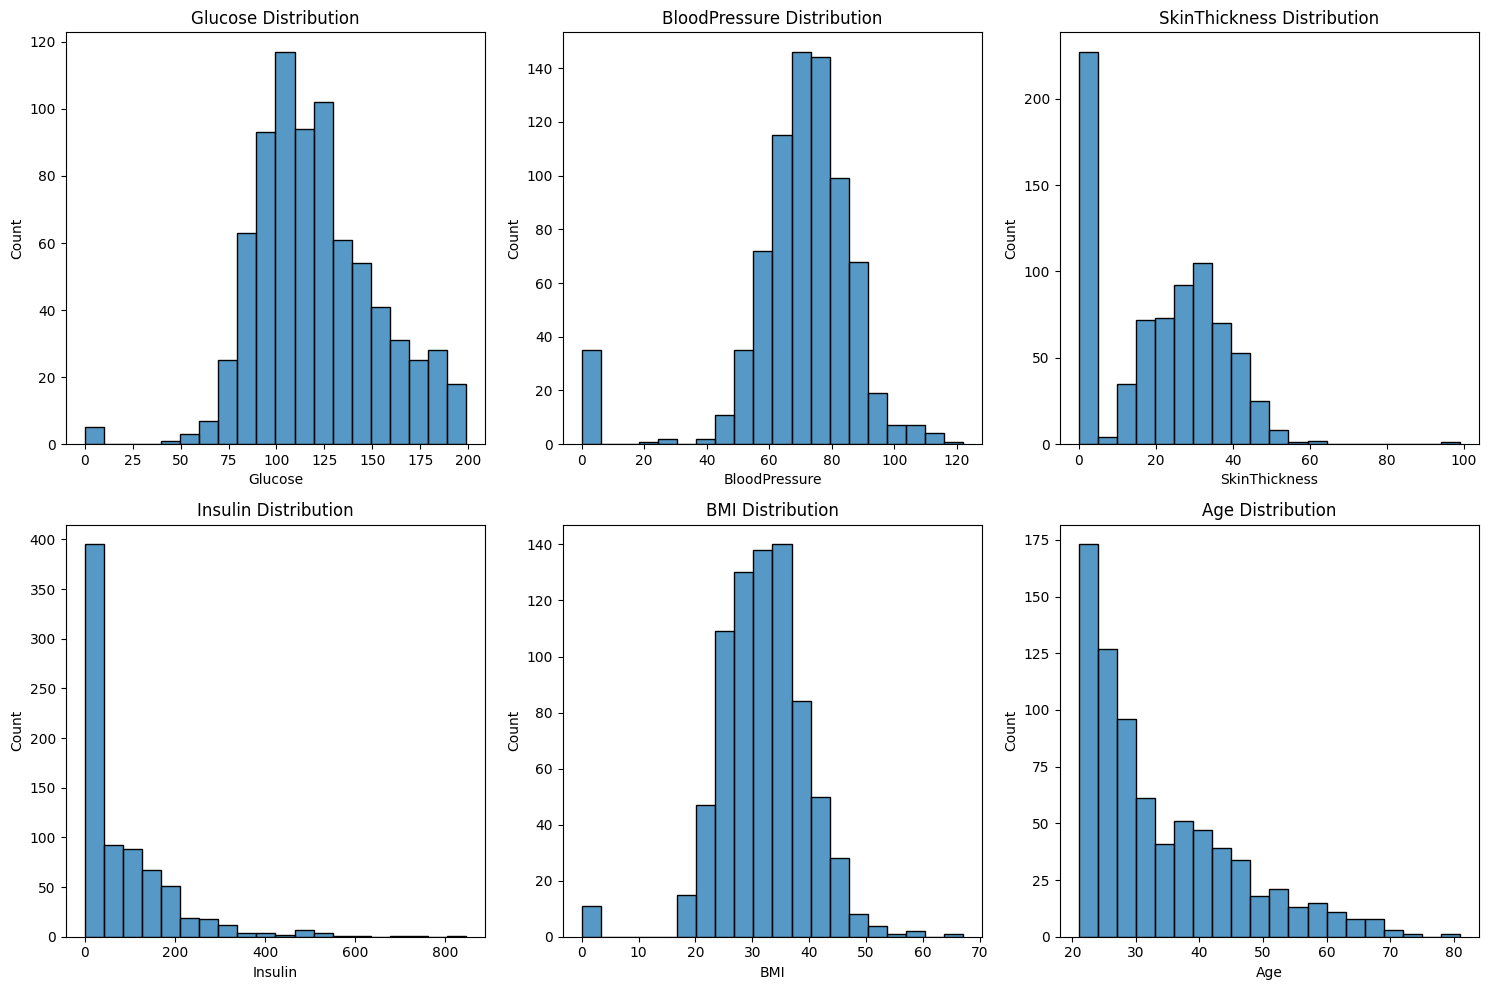

In [7]:
# Visualize the distribution of features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(data['Glucose'], bins=20, ax=axes[0, 0]).set(title='Glucose Distribution')
sns.histplot(data['BloodPressure'], bins=20, ax=axes[0, 1]).set(title='BloodPressure Distribution')
sns.histplot(data['SkinThickness'], bins=20, ax=axes[0, 2]).set(title='SkinThickness Distribution')
sns.histplot(data['Insulin'], bins=20, ax=axes[1, 0]).set(title='Insulin Distribution')
sns.histplot(data['BMI'], bins=20, ax=axes[1, 1]).set(title='BMI Distribution')
sns.histplot(data['Age'], bins=20, ax=axes[1, 2]).set(title='Age Distribution')
plt.tight_layout()
plt.show()

In [8]:
# Replace 0s with NaN for specific columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)

# Fill missing values with the median of each column
data[cols_with_zeros] = data[cols_with_zeros].fillna(data[cols_with_zeros].median())


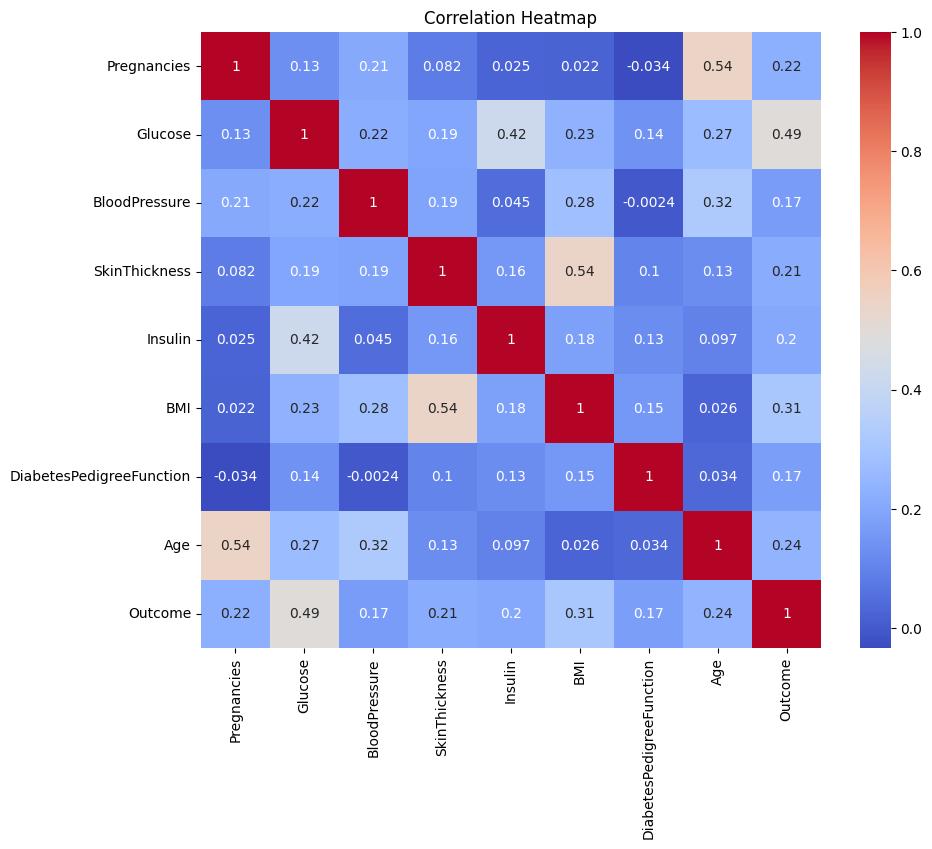

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target (y)
X = data.drop(columns='Outcome')
y = data['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [13]:
# Make predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [15]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.75
Precision: 0.67
Recall: 0.62
F1 Score: 0.64


In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
# Set up the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [18]:
# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='f1')


In [19]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']},
             scoring='f1')

In [20]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'C': 100, 'solver': 'liblinear'}
Best F1 Score: 0.621974355782575


In [21]:
# Initialize and train the tuned model
best_model = LogisticRegression(C=100, solver='liblinear', max_iter=1000, random_state=42)
best_model.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=1000, random_state=42, solver='liblinear')

In [22]:
# Make predictions with the tuned model
y_pred_tuned = best_model.predict(X_test)

In [23]:
# Convert DataFrame to a 2D NumPy array
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

X_array = X.values  # Now X_array is a 2D NumPy array


In [24]:
# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

In [25]:
print(f'Tuned Model - Accuracy: {accuracy_tuned:.2f}')
print(f'Tuned Model - Precision: {precision_tuned:.2f}')
print(f'Tuned Model - Recall: {recall_tuned:.2f}')
print(f'Tuned Model - F1 Score: {f1_tuned:.2f}')

Tuned Model - Accuracy: 0.75
Tuned Model - Precision: 0.67
Tuned Model - Recall: 0.62
Tuned Model - F1 Score: 0.64


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)


In [29]:
import pickle

# Save the Random Forest model to a file
pickle.dump(rf_model, open('random_forest_model.pkl', 'wb'))

In [30]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [31]:
print(f'Random Forest - Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest - Precision: {precision_rf:.2f}')
print(f'Random Forest - Recall: {recall_rf:.2f}')
print(f'Random Forest - F1 Score: {f1_rf:.2f}')

Random Forest - Accuracy: 0.75
Random Forest - Precision: 0.64
Random Forest - Recall: 0.67
Random Forest - F1 Score: 0.65


In [32]:
# Convert DataFrame to a 2D NumPy array
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

X_array = X.values  # Now X_array is a 2D NumPy array


In [35]:
# Example: Prepare multiple new instances for prediction
new_data = np.array([
    [3,78,50,32,88,31,0.248,26],
])

# Make predictions
y_pred_rf = rf_model.predict(new_data)

# Display predictions
for i, prediction in enumerate(y_pred_rf):
    print(f'Prediction for instance {i + 1}: {"Diabetes" if prediction == 1 else "No Diabetes"}')


Prediction for instance 1: Diabetes


c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [34]:
# Example: Prepare multiple new instances for prediction
new_data = np.array([
    [6, 148, 72, 35, 0, 33.6, 0.627, 50],
    [1, 85, 66, 29, 0, 26.6, 0.351, 31],  # Another instance
    [8, 183, 64, 0, 0, 23.3, 0.672, 32]   # And another
])

# Predict using the tuned model
y_pred_tuned = best_model.predict(new_data)

# Display predictions
for i, prediction in enumerate(y_pred_tuned):
    print(f'Prediction for instance {i + 1}: {"Diabetes" if prediction == 1 else "No Diabetes"}')


Prediction for instance 1: Diabetes
Prediction for instance 2: No Diabetes
Prediction for instance 3: Diabetes


c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
